<a href="https://colab.research.google.com/github/isaacyeremia/project-Clustering/blob/main/Project_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
import pandas as pd

# Baca file Excel dari Google Drive
file_path = '/content/drive/MyDrive/Data_mining/IP___Riwayat_Medical_01012016 s.d 19032024(1).xls'
df = pd.read_excel(file_path)

In [61]:
# Cek jumlah data yang hilang (missing data) di setiap kolom
print(df.isnull().sum())


no                  0
diagnosa            0
institusi           0
area                0
rumah            1131
tipe             2750
biaya_berobat      25
dtype: int64


In [62]:
# prompt: tolong handle data mising yang ada di kolom fitur fitur berikut ini dengan mengisi kolom data mising:
# no                  0
# diagnosa            0
# institusi           0
# area                0
# rumah            1131
# tipe             2750
# biaya_berobat      25
# dtype: int64

from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

# Baca file Excel dari Google Drive
file_path = '/content/drive/MyDrive/Data_mining/IP___Riwayat_Medical_01012016 s.d 19032024(1).xls'
df = pd.read_excel(file_path)

# Mengisi missing value pada kolom 'rumah' dengan modus (nilai yang paling sering muncul)
df['rumah'].fillna(df['rumah'].mode()[0], inplace=True)

# Mengisi missing value pada kolom 'tipe' dengan modus (nilai yang paling sering muncul)
df['tipe'].fillna(df['tipe'].mode()[0], inplace=True)

# Mengisi missing value pada kolom 'biaya_berobat' dengan median (nilai tengah)
df['biaya_berobat'].fillna(df['biaya_berobat'].median(), inplace=True)

# Cek kembali jumlah data yang hilang (missing data) di setiap kolom
print(df.isnull().sum())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
no               0
diagnosa         0
institusi        0
area             0
rumah            0
tipe             0
biaya_berobat    0
dtype: int64


<ipython-input-62-64fb50c67e10>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rumah'].fillna(df['rumah'].mode()[0], inplace=True)
<ipython-input-62-64fb50c67e10>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [63]:
# prompt: simpan dataset yang sudah terhandle, ke gdrive

# Simpan dataset yang sudah dihandle ke Google Drive
output_file_path = '/content/drive/MyDrive/Data_mining/IP___Riwayat_Medical_01012016 s.d 19032024_handled.xlsx'
df.to_excel(output_file_path, index=False)

print(f"Dataset berhasil disimpan ke: {output_file_path}")

Dataset berhasil disimpan ke: /content/drive/MyDrive/Data_mining/IP___Riwayat_Medical_01012016 s.d 19032024_handled.xlsx


In [64]:
# prompt: tolong buat semua isi data menjadi lowercase dan buat agar isi kolom fitur biaya_berobat menjadi range 250.000, jadi contoh pertama 0-250.000 lalu kedua ada 250.000-500.000

# Convert all string columns to lowercase
for column in df.select_dtypes(['object']):
  df[column] = df[column].str.lower()

# Create a new column for the range of biaya_berobat
def categorize_biaya(biaya):
  if biaya <= 250000:
    return '0-250.000'
  elif biaya <= 500000:
    return '250.000-500.000'
  elif biaya <= 750000:
    return '500.000-750.000'
  elif biaya <= 1000000:
    return '750.000-1.000.000'
  else:
    return '>1.000.000'

df['range_biaya_berobat'] = df['biaya_berobat'].apply(categorize_biaya)

# Print the updated DataFrame
print(df.head())


# Simpan dataset yang sudah dihandle ke Google Drive
output_file_path = '/content/drive/MyDrive/Data_mining/IP___Riwayat_Medical_01012016 s.d 19032024_handled_lowercase_range.xlsx'
df.to_excel(output_file_path, index=False)

print(f"Dataset berhasil disimpan ke: {output_file_path}")

   no         diagnosa     institusi     area                          rumah  \
0   1  hiperkolesterol   rumah sakit  bandung                   rs borromeus   
1   2   hiperlipidemia  laboratorium    garut  klinik bhakti ip kosaka garut   
2   3   hiperlipidemia    poliklinik    garut  klinik bhakti ip kosaka garut   
3   4          vertigo    poliklinik    garut  klinik bhakti ip kosaka garut   
4   5         check up  laboratorium    garut  klinik bhakti ip kosaka garut   

          tipe  biaya_berobat range_biaya_berobat  
0  dokter umum      1172500.0          >1.000.000  
1  dokter umum       454000.0     250.000-500.000  
2  dokter umum        59000.0           0-250.000  
3  dokter umum        80500.0           0-250.000  
4  dokter umum       586000.0     500.000-750.000  
Dataset berhasil disimpan ke: /content/drive/MyDrive/Data_mining/IP___Riwayat_Medical_01012016 s.d 19032024_handled_lowercase_range.xlsx


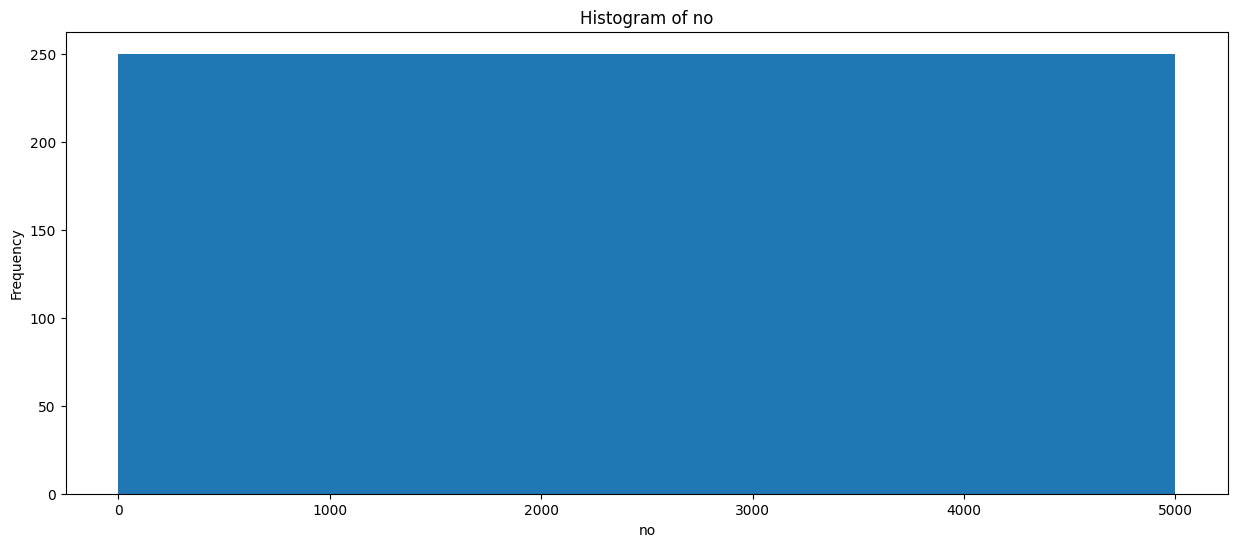

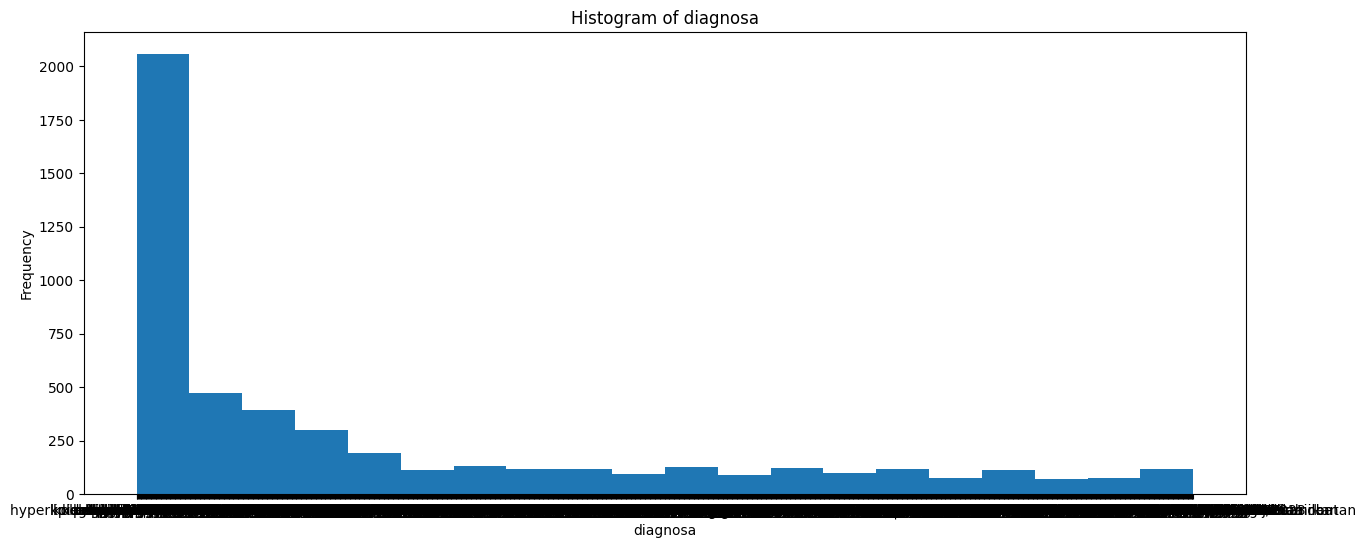

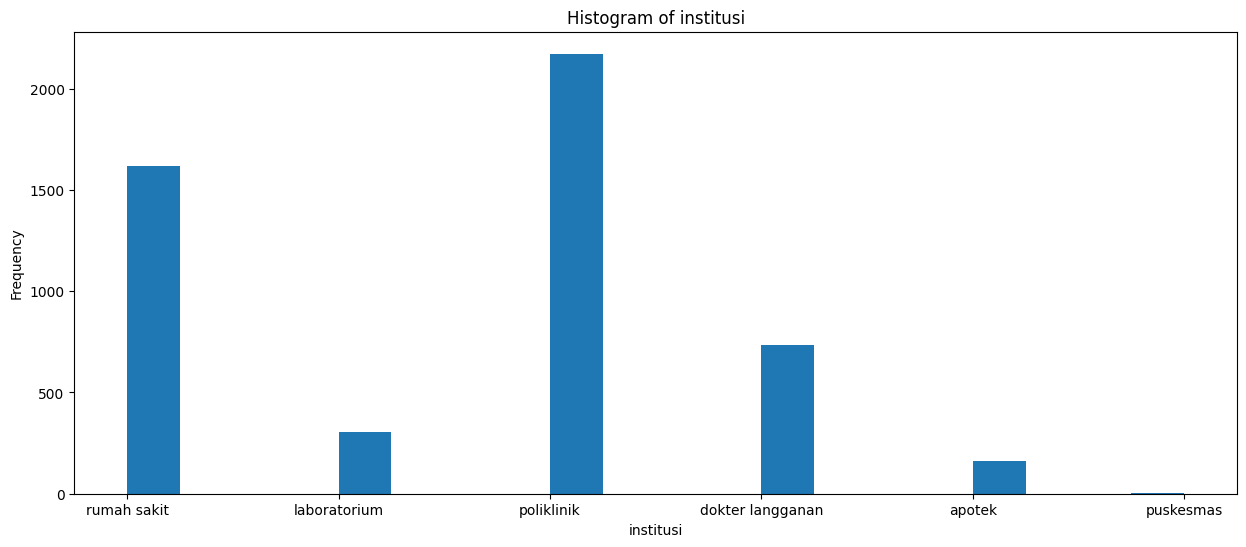

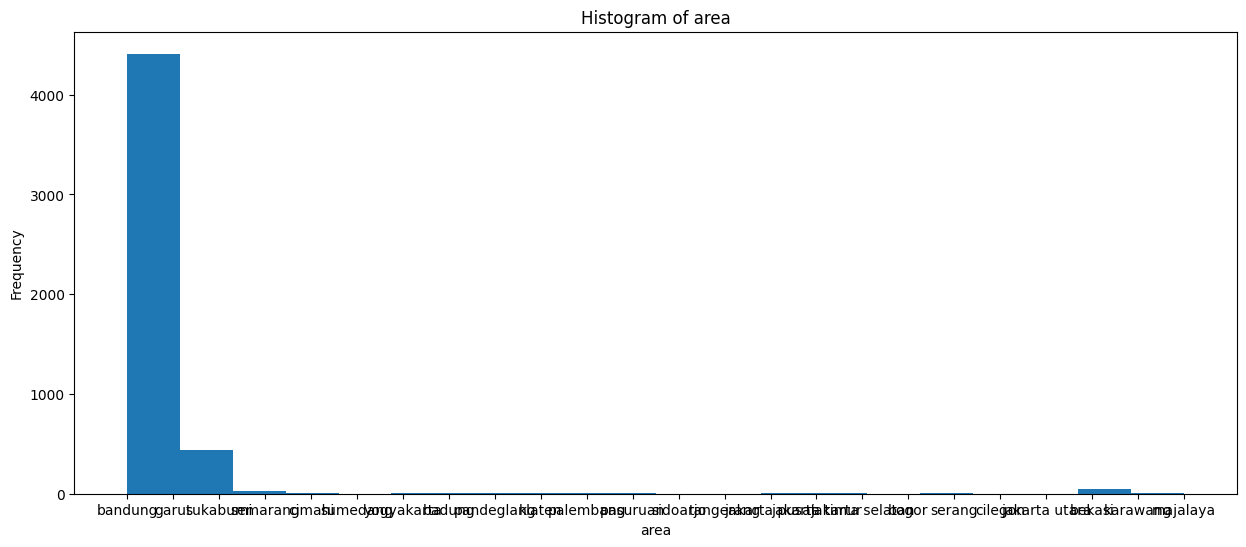

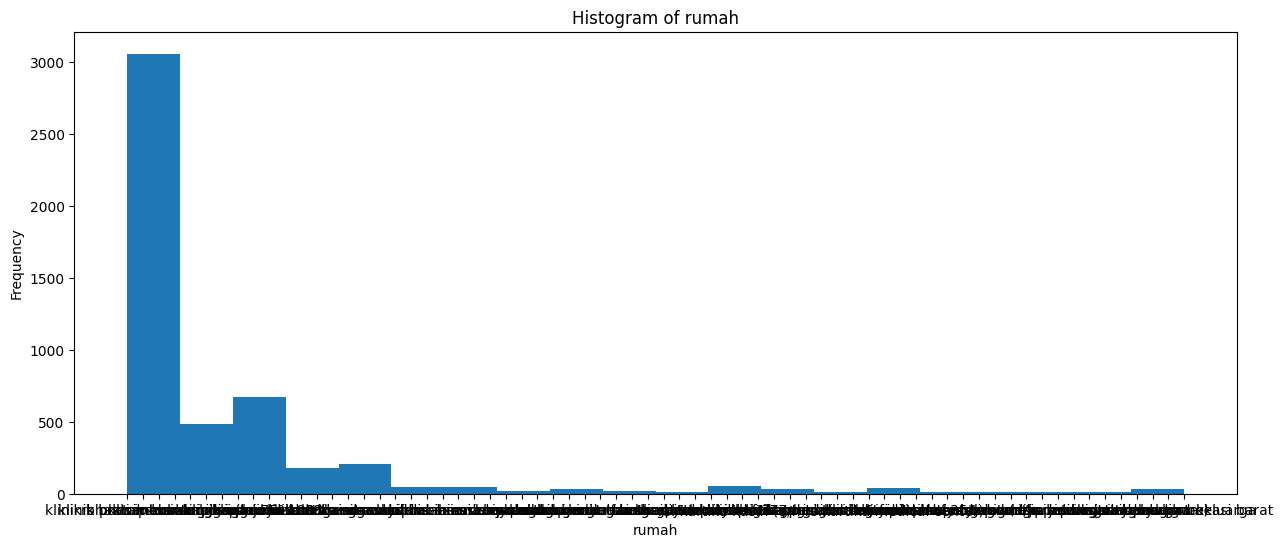

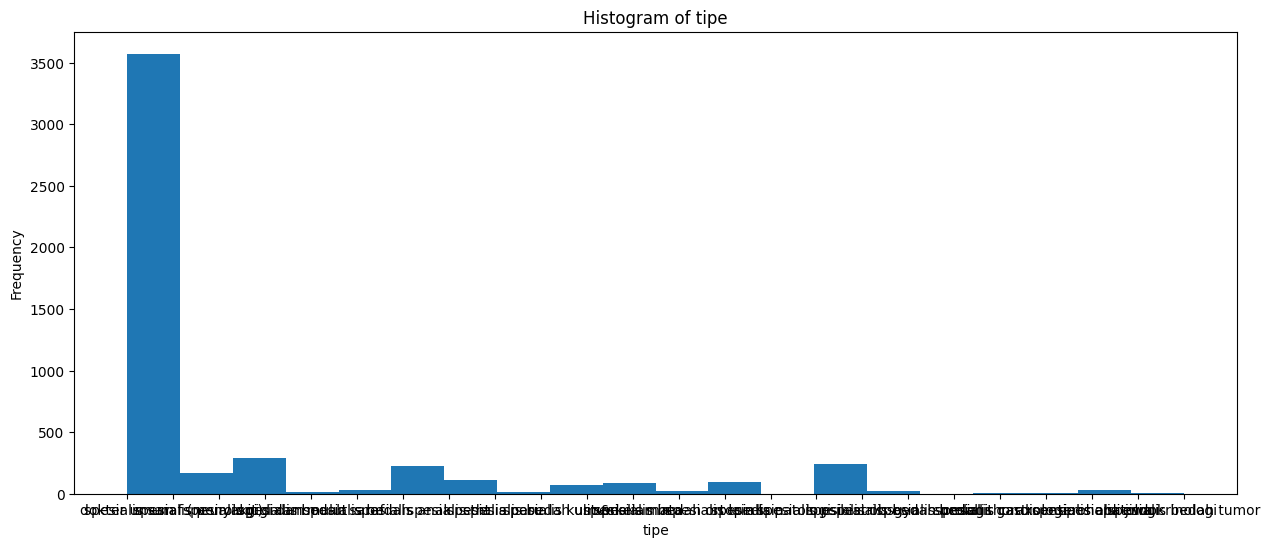

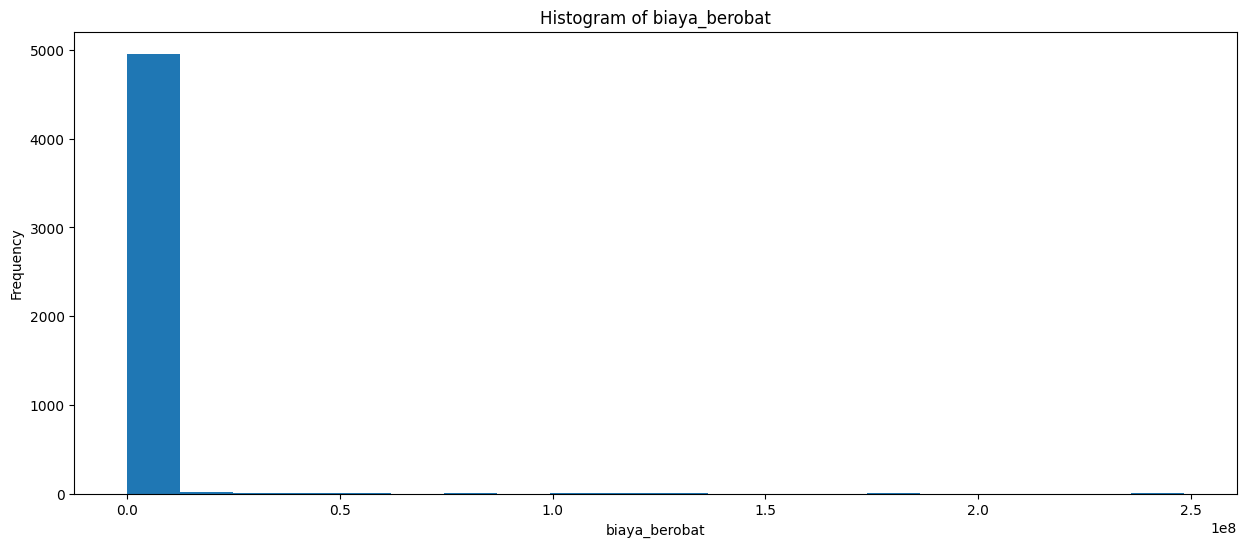

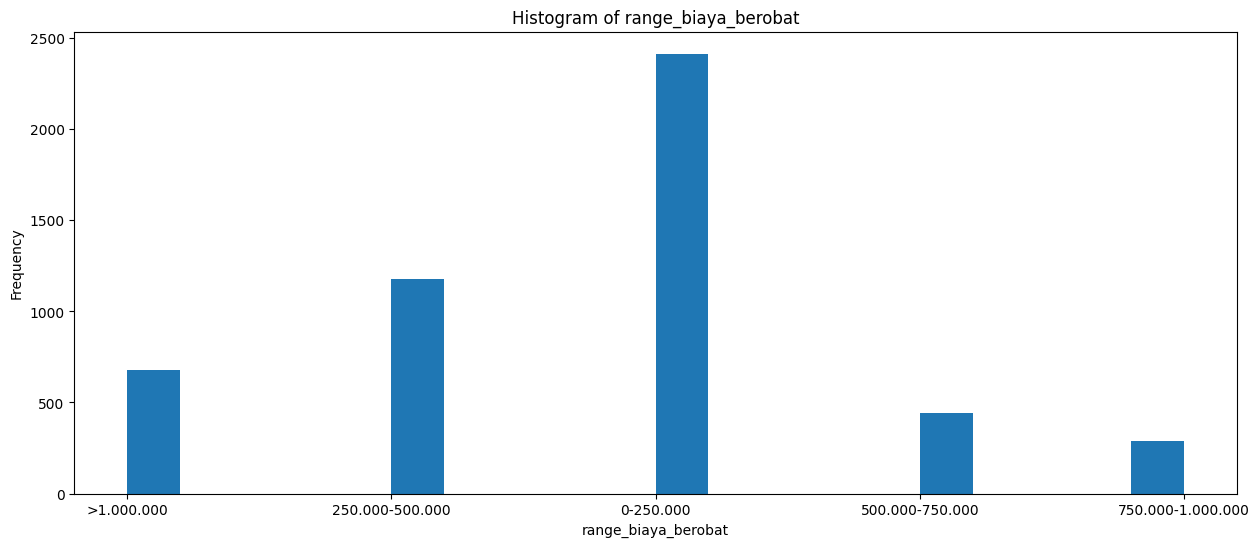

In [65]:

import matplotlib.pyplot as plt

for column in df.columns:
  plt.figure(figsize=(15, 6))  # Atur lebar dan panjang diagram
  plt.hist(df[column], bins=20)  # Buat histogram dengan 20 bins
  plt.title(f"Histogram of {column}")
  plt.xlabel(column)
  plt.ylabel("Frequency")
  plt.show()

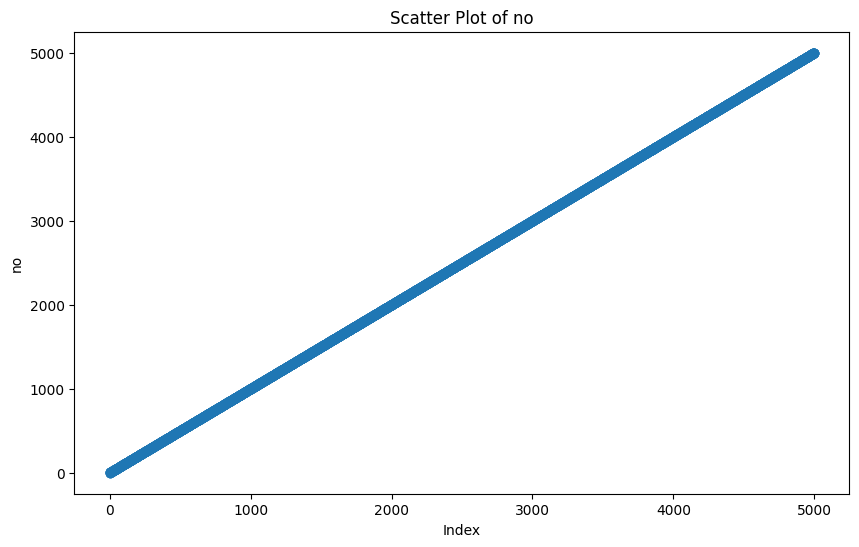

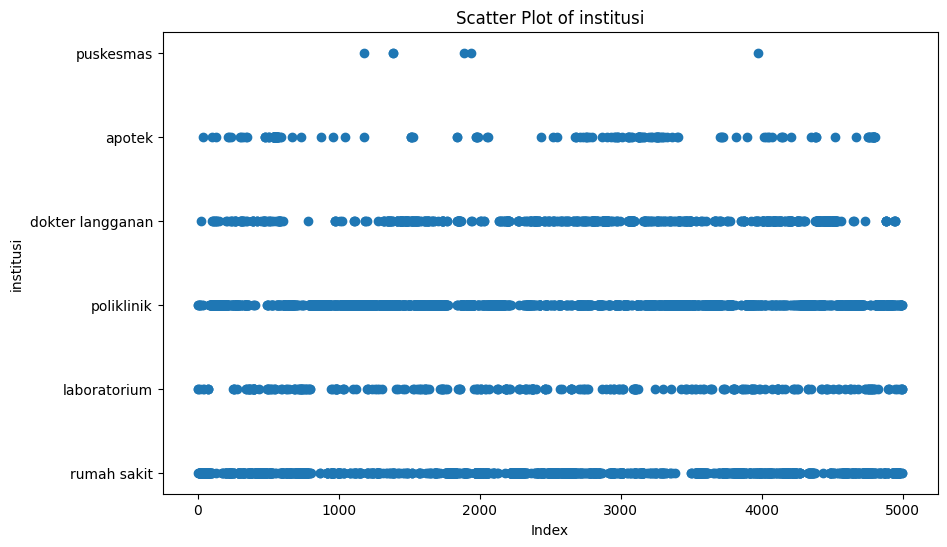

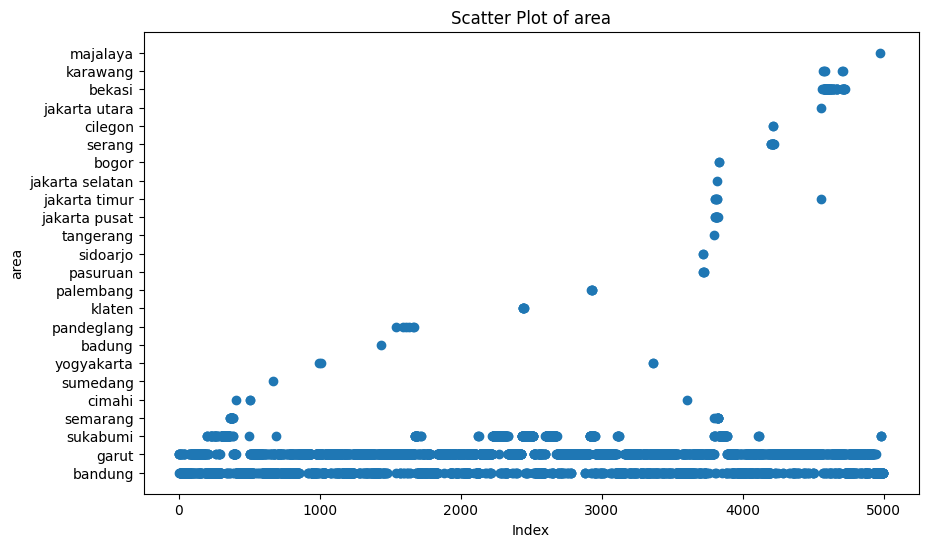

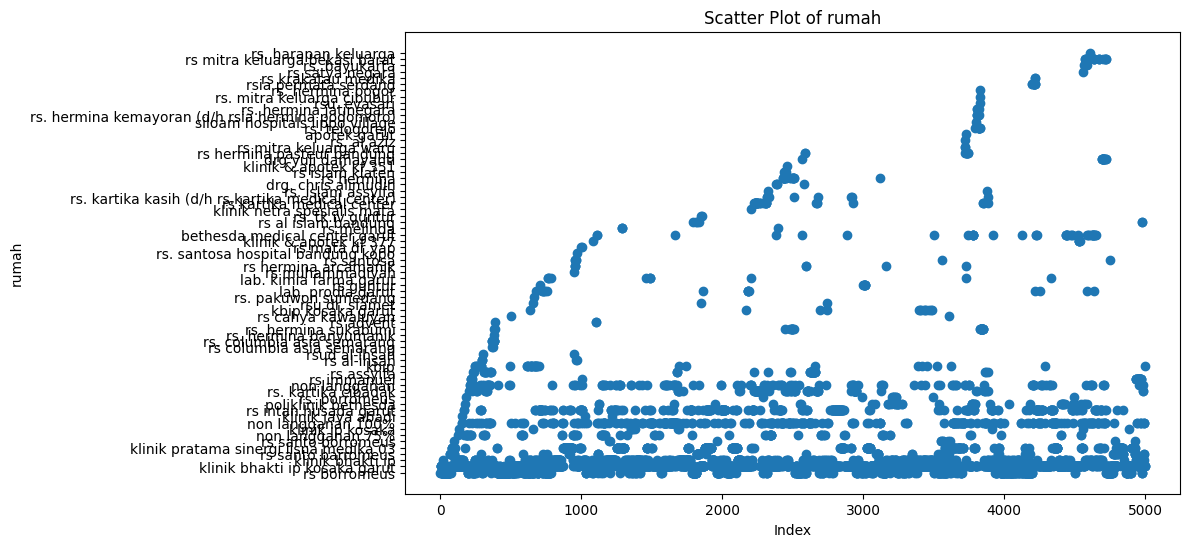

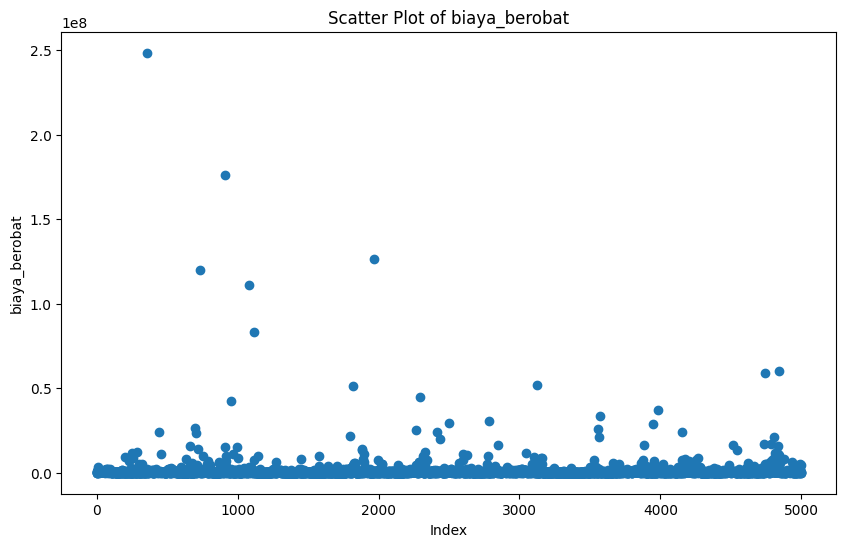

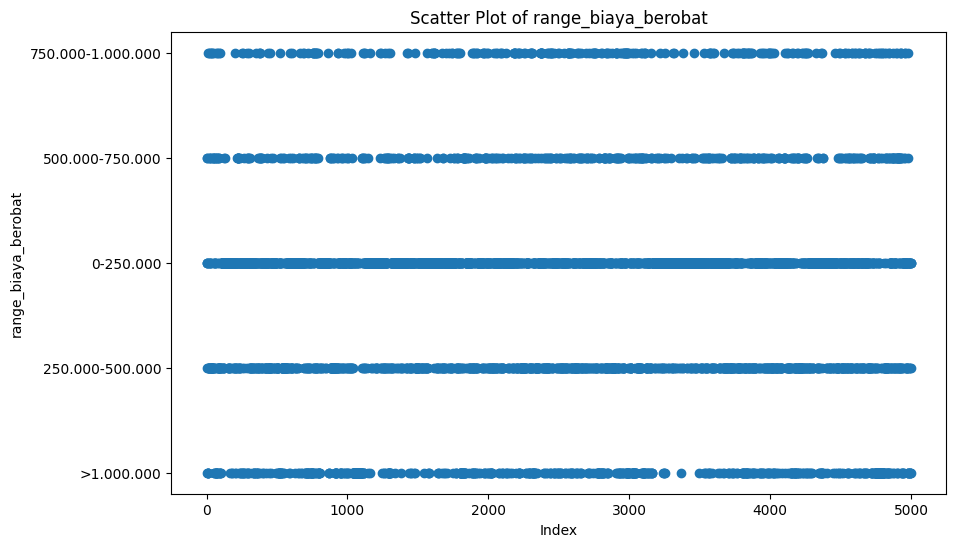

In [66]:
for column in df.columns:
  plt.figure(figsize=(10, 6))
  plt.scatter(df.index, df[column])
  plt.title(f"Scatter Plot of {column}")
  plt.xlabel("Index")
  plt.ylabel(column)
  plt.show()


In [67]:
from sklearn.preprocessing import LabelEncoder

# Mengasumsikan dataset adalah df dan kolom 'diagnosa' adalah kategorik
dataolahencoding = df.copy() # Membuat salinan dataset untuk mencegah modifikasi dataset asli

# Label encoding untuk kolom 'diagnosa'
encoder = LabelEncoder()
dataolahencoding['diagnosa_encod'] = encoder.fit_transform(dataolahencoding['diagnosa'])
dataolahencoding['institusi_encod'] = encoder.fit_transform(dataolahencoding['institusi'])
dataolahencoding['area_encod'] = encoder.fit_transform(dataolahencoding['area'])
dataolahencoding['rumah_encod'] = encoder.fit_transform(dataolahencoding['rumah'])
dataolahencoding['tipe_encod'] = encoder.fit_transform(dataolahencoding['tipe'])
dataolahencoding['biaya_berobat_encod'] = encoder.fit_transform(dataolahencoding['biaya_berobat'])

In [68]:

dataolahencoding.head()

no         diagnosa     institusi     area                          rumah  \
0   1  hiperkolesterol   rumah sakit  bandung                   rs borromeus   
1   2   hiperlipidemia  laboratorium    garut  klinik bhakti ip kosaka garut   
2   3   hiperlipidemia    poliklinik    garut  klinik bhakti ip kosaka garut   
3   4          vertigo    poliklinik    garut  klinik bhakti ip kosaka garut   
4   5         check up  laboratorium    garut  klinik bhakti ip kosaka garut   

          tipe  biaya_berobat range_biaya_berobat  diagnosa_encod  \
0  dokter umum      1172500.0          >1.000.000             404   
1  dokter umum       454000.0     250.000-500.000             409   
2  dokter umum        59000.0           0-250.000             409   
3  dokter umum        80500.0           0-250.000            1270   
4  dokter umum       586000.0     500.000-750.000             119   

   institusi_encod  area_encod  rumah_encod  tipe_encod  biaya_berobat_encod  
0                5           1           24           0                 2724  
1                2           6            9           0                 1890  
2                3           6            9           0                   51  
3                3           6            9           0                  137  
4                2           6            9           0                 2181

In [69]:
dataolahencoding = dataolahencoding.drop(['diagnosa', 'institusi', 'area', 'rumah', 'tipe', 'biaya_berobat'], axis=1)
dataolahencoding.head()


no range_biaya_berobat  diagnosa_encod  institusi_encod  area_encod  \
0   1          >1.000.000             404                5           1   
1   2     250.000-500.000             409                2           6   
2   3           0-250.000             409                3           6   
3   4           0-250.000            1270                3           6   
4   5     500.000-750.000             119                2           6   

   rumah_encod  tipe_encod  biaya_berobat_encod  
0           24           0                 2724  
1            9           0                 1890  
2            9           0                   51  
3            9           0                  137  
4            9           0                 2181

Skipping box plot for non-numeric column: range_biaya_berobat


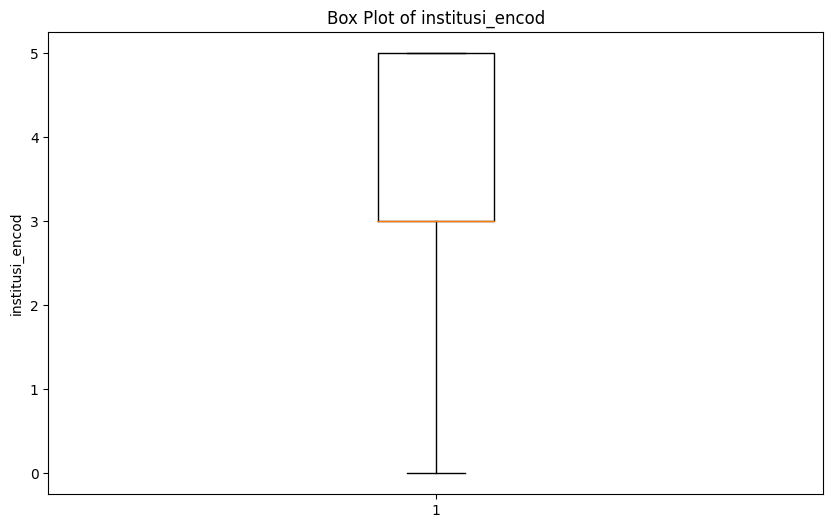

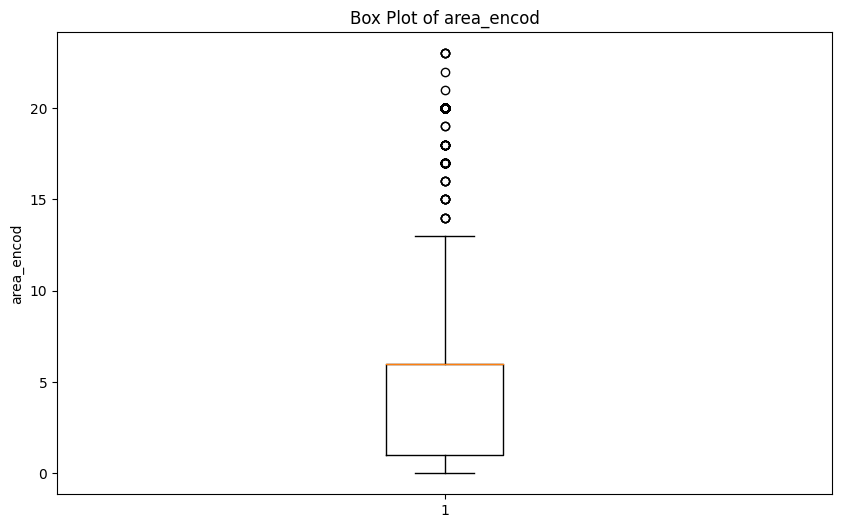

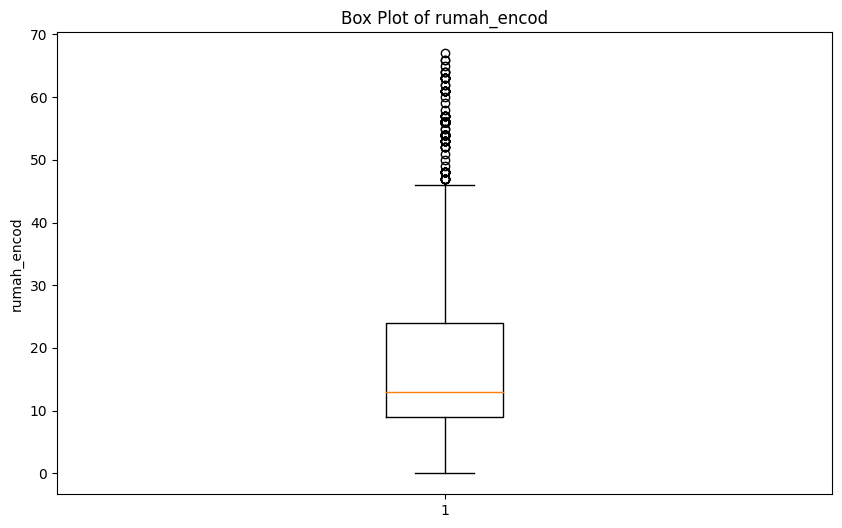

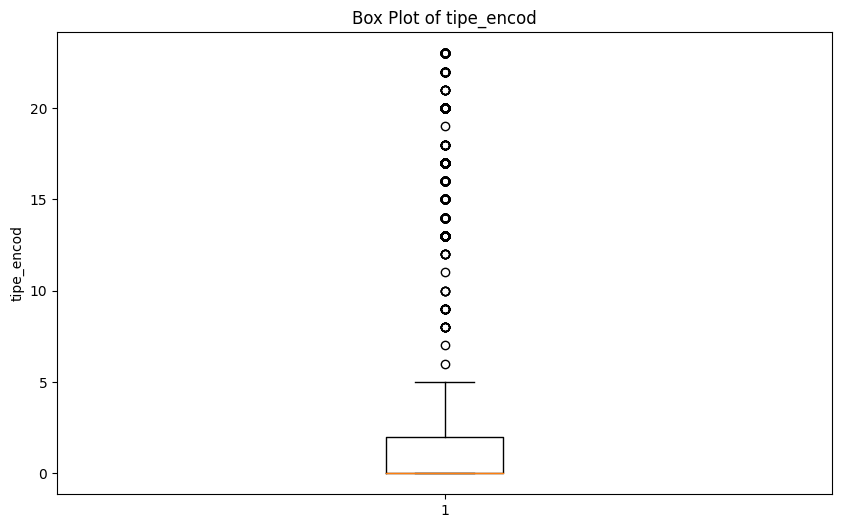

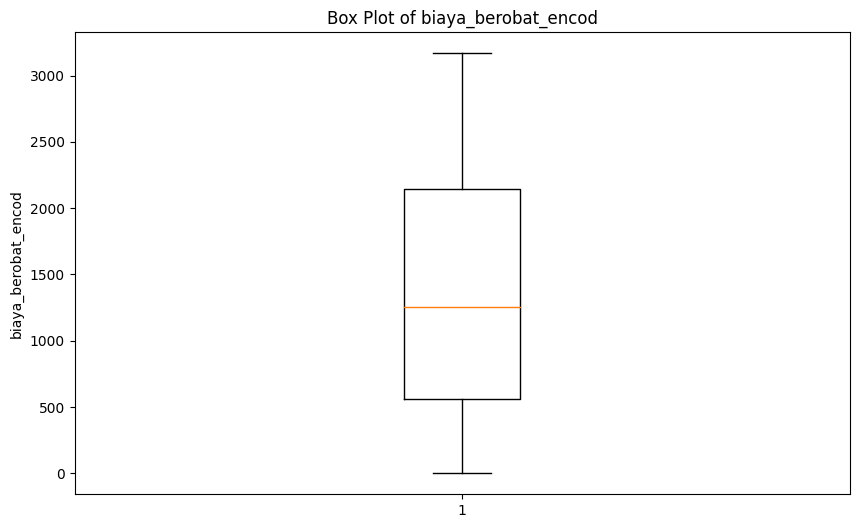

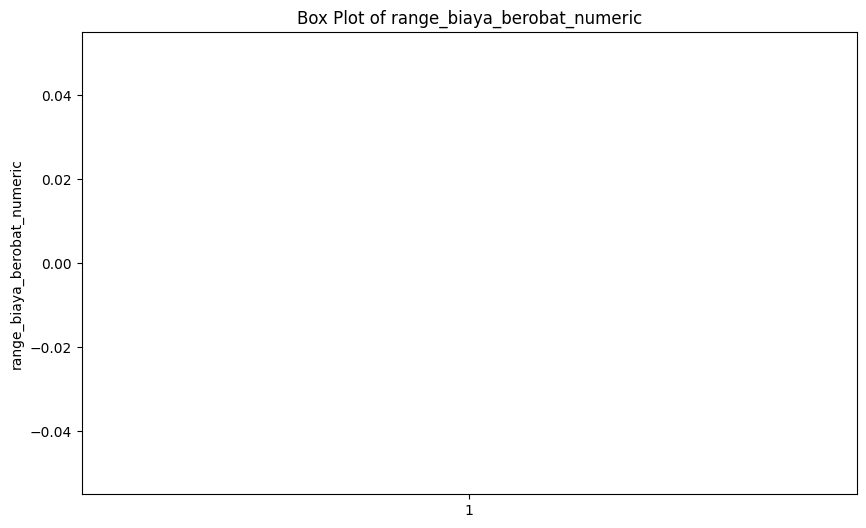

In [70]:
dataolahencoding['range_biaya_berobat_numeric'] = pd.to_numeric(dataolahencoding['range_biaya_berobat'].str.split('-').str[0], errors='coerce')

for column in dataolahencoding.columns:
  if pd.api.types.is_numeric_dtype(dataolahencoding[column]):  # Check if column is numeric
    plt.figure(figsize=(10, 6))
    plt.boxplot(dataolahencoding[column])
    plt.title(f"Box Plot of {column}")
    plt.ylabel(column)
    plt.show()
  else:
    print(f"Skipping box plot for non-numeric column: {column}")

In [71]:
import numpy as np
import pandas as pd

def find_outliers_iqr(data):
  # Convert data to numeric if it's not already
  if not pd.api.types.is_numeric_dtype(data):
    data = pd.to_numeric(data, errors='coerce')  # Convert to numeric, handle errors

  # Proceed with outlier calculation if data is numeric
  if pd.api.types.is_numeric_dtype(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    return outliers
  else:
    print(f"Skipping outlier calculation for non-numeric column")
    return []  # Return empty list for non-numeric columns

for column in dataolahencoding.columns:
  outliers = find_outliers_iqr(dataolahencoding[column])
  if outliers:
    print(f"Kolom '{column}' memiliki outlier:")
    print(outliers)
    print()

Kolom 'area_encod' memiliki outlier:
[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 17, 17, 17, 20, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 20, 20, 20, 21, 20, 23, 23, 15, 15, 15, 15, 15, 15, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20

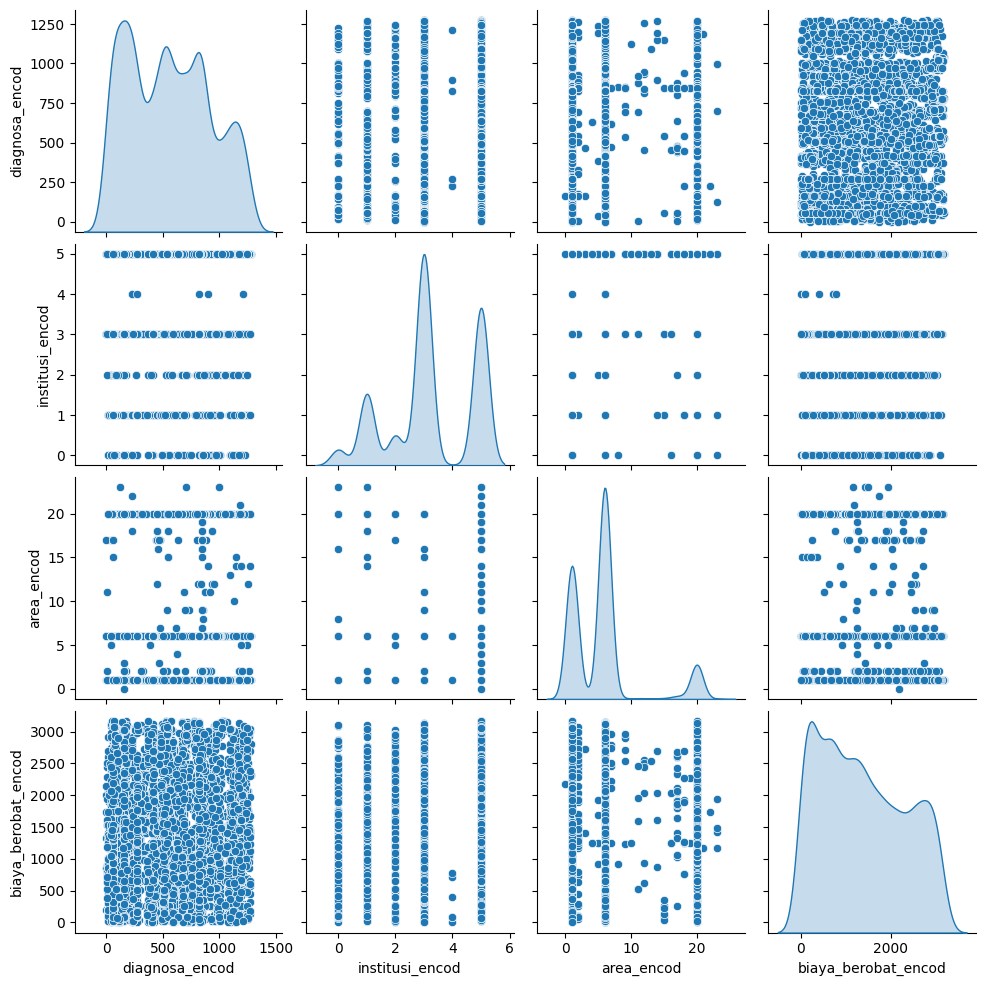

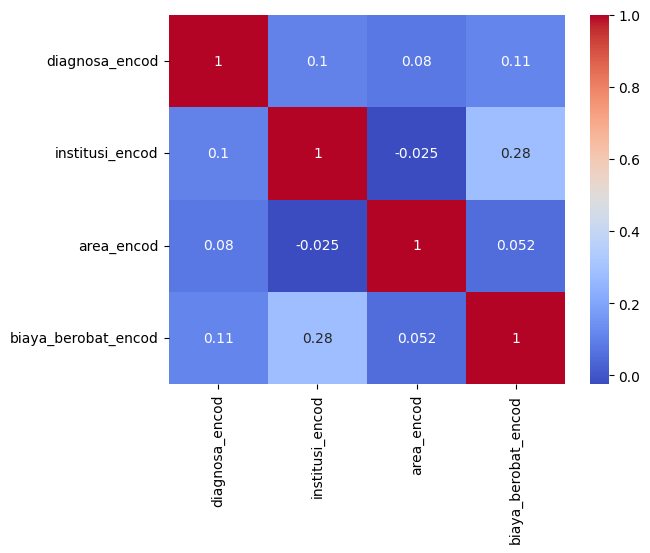

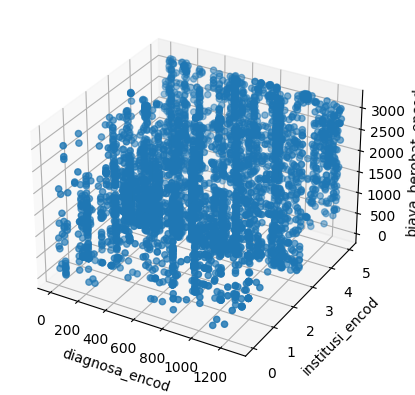

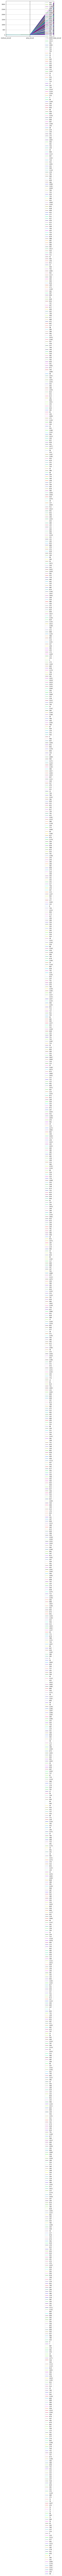

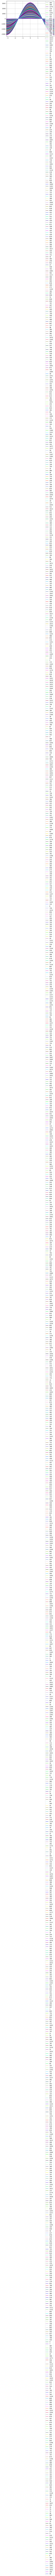

In [72]:
# prompt: Buatkan 5 diagram  MULTIVARIATE  ANALYSIS

import seaborn as sns
import matplotlib.pyplot as plt

# 1. Scatter Plot Matrix (untuk melihat hubungan antar variabel numerik)
sns.pairplot(dataolahencoding[['diagnosa_encod', 'institusi_encod', 'area_encod', 'biaya_berobat_encod']], diag_kind='kde')
plt.show()


# 2. Heatmap Korelasi (untuk melihat korelasi antar variabel numerik)
correlation_matrix = dataolahencoding[['diagnosa_encod', 'institusi_encod', 'area_encod', 'biaya_berobat_encod']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


# 3. 3D Scatter Plot (untuk melihat hubungan antar tiga variabel numerik)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataolahencoding['diagnosa_encod'], dataolahencoding['institusi_encod'], dataolahencoding['biaya_berobat_encod'])
ax.set_xlabel('diagnosa_encod')
ax.set_ylabel('institusi_encod')
ax.set_zlabel('biaya_berobat_encod')
plt.show()


# 4. Parallel Coordinates Plot (untuk melihat hubungan antar variabel numerik dan kategorik)
from pandas.plotting import parallel_coordinates

parallel_coordinates(dataolahencoding[['diagnosa_encod', 'institusi_encod', 'area_encod', 'biaya_berobat_encod']], 'diagnosa_encod')
plt.show()


# 5. Andrews Curves (untuk melihat hubungan antar variabel numerik dan kategorik)
from pandas.plotting import andrews_curves

andrews_curves(dataolahencoding[['diagnosa_encod', 'institusi_encod', 'area_encod', 'biaya_berobat_encod']], 'diagnosa_encod')
plt.show()

In [73]:
dataolahencoding

no range_biaya_berobat  diagnosa_encod  institusi_encod  area_encod  \
0        1          >1.000.000             404                5           1   
1        2     250.000-500.000             409                2           6   
2        3           0-250.000             409                3           6   
3        4           0-250.000            1270                3           6   
4        5     500.000-750.000             119                2           6   
...    ...                 ...             ...              ...         ...   
4995  4996          >1.000.000            1025                5           1   
4996  4997           0-250.000             159                2           1   
4997  4998     250.000-500.000             104                2           1   
4998  4999           0-250.000              90                2           1   
4999  5000           0-250.000             417                3           1   

      rumah_encod  tipe_encod  biaya_berobat_encod  \
0              24           0                 2724   
1               9           0                 1890   
2               9           0                   51   
3               9           0                  137   
4               9           0                 2181   
...           ...         ...                  ...   
4995           41           0                 3050   
4996            9           0                  519   
4997            9           0                 1753   
4998            9           0                  519   
4999            4           0                  660   

      range_biaya_berobat_numeric  
0                             NaN  
1                           250.0  
2                             0.0  
3                             0.0  
4                           500.0  
...                           ...  
4995                          NaN  
4996                          0.0  
4997                        250.0  
4998                          0.0  
4999                          0.0  

[5000 rows x 9 columns]

In [74]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [75]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer  # Import SimpleImputer

# Assuming 'dataolahencoding' is your DataFrame

# 1. Identify and handle non-numeric columns
for column in dataolahencoding.columns:
    if dataolahencoding[column].dtype == 'object':  # Check if column is of object type
        try:
            # Attempt to convert to numeric, replacing non-convertible values with NaN
            dataolahencoding[column] = pd.to_numeric(dataolahencoding[column], errors='coerce')
            # If needed, replace NaN with a suitable strategy (e.g., mean, median)
            #dataolahencoding[column].fillna(dataolahencoding[column].mean(), inplace=True)
        except ValueError:
            print(f"Column '{column}' contains non-numeric values that cannot be converted.")

# 2. Select only numeric features for PCA
numeric_features = dataolahencoding.select_dtypes(include=['number']).columns
x = dataolahencoding[numeric_features]

# 3. Impute NaN values using SimpleImputer
# Create an instance of SimpleImputer with strategy='mean' to replace NaN with mean
imputer = SimpleImputer(strategy='mean')
# Fit the imputer to your data and transform it
x = imputer.fit_transform(x) # Now x will be a NumPy array with NaN values imputed

# 4. Proceed with PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

print(principalDf)

# ... (rest of your plotting code)

      principal component 1  principal component 2
0              -2418.349263            1475.029358
1              -2463.633043             666.406326
2              -2570.136519           -1183.536659
3              -2563.425604           -1054.669786
4              -2441.230134             976.786544
...                     ...                    ...
4995            2587.298916            1538.382111
4996            2441.720098           -1025.116623
4997            2515.847261             226.096038
4998            2443.649869           -1028.777504
4999            2452.962039            -873.205177

[5000 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['range_biaya_berobat']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [76]:

print(principalDf)

      principal component 1  principal component 2
0              -2418.349263            1475.029358
1              -2463.633043             666.406326
2              -2570.136519           -1183.536659
3              -2563.425604           -1054.669786
4              -2441.230134             976.786544
...                     ...                    ...
4995            2587.298916            1538.382111
4996            2441.720098           -1025.116623
4997            2515.847261             226.096038
4998            2443.649869           -1028.777504
4999            2452.962039            -873.205177

[5000 rows x 2 columns]


In [77]:

from sklearn.cluster import KMeans

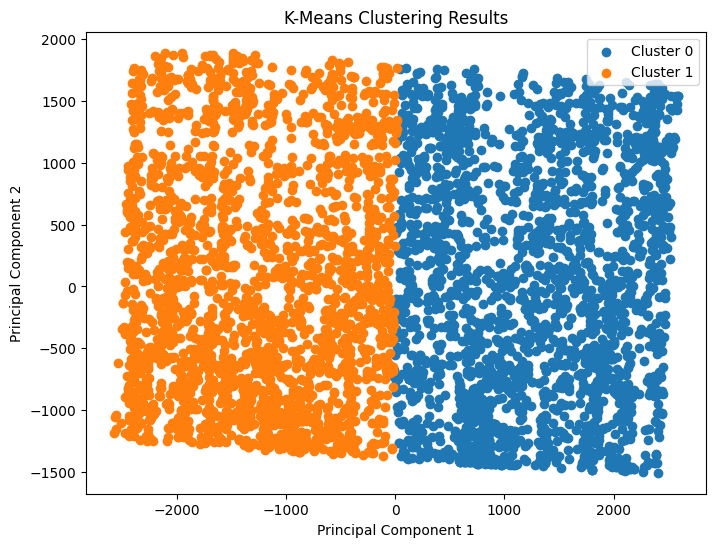

In [78]:

n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(principalDf)
labels = kmeans.labels_
principalDf['cluster'] = labels

plt.figure(figsize=(8, 6))
for i in range(n_clusters):
  plt.scatter(principalDf[principalDf['cluster'] == i]['principal component 1'],
              principalDf[principalDf['cluster'] == i]['principal component 2'],
              label=f'Cluster {i}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Results')
plt.legend()
plt.show()


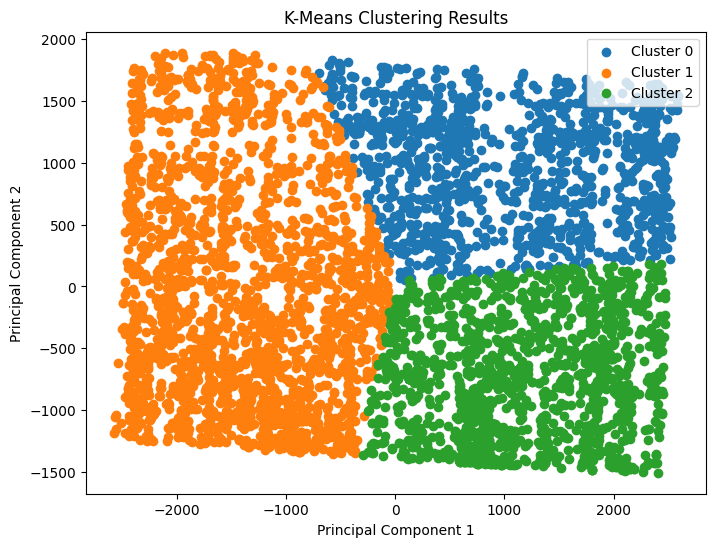

In [79]:

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(principalDf)
labels = kmeans.labels_
principalDf['cluster'] = labels

plt.figure(figsize=(8, 6))
for i in range(n_clusters):
  plt.scatter(principalDf[principalDf['cluster'] == i]['principal component 1'],
              principalDf[principalDf['cluster'] == i]['principal component 2'],
              label=f'Cluster {i}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Results')
plt.legend()
plt.show()

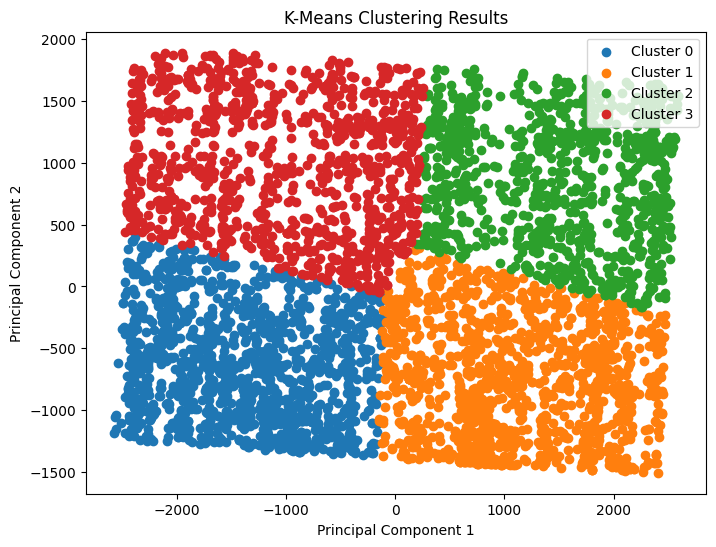

In [80]:

n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(principalDf)
labels = kmeans.labels_
principalDf['cluster'] = labels

plt.figure(figsize=(8, 6))
for i in range(n_clusters):
  plt.scatter(principalDf[principalDf['cluster'] == i]['principal component 1'],
              principalDf[principalDf['cluster'] == i]['principal component 2'],
              label=f'Cluster {i}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Results')
plt.legend()
plt.show()

Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1147 - val_loss: 0.1071
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1051 - val_loss: 0.0984
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0959 - val_loss: 0.0910
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0892 - val_loss: 0.0847
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0827 - val_loss: 0.0795
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0784 - val_loss: 0.0751
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0743 - val_loss: 0.0714
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0704 - val_loss: 0.0683
Epoch 9/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0685 - val_loss: 0.0656
Epoch 10/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0654 - val_loss: 0.0634
Epoch 11/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0633 - val_loss: 0.0615
Epoch 12/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

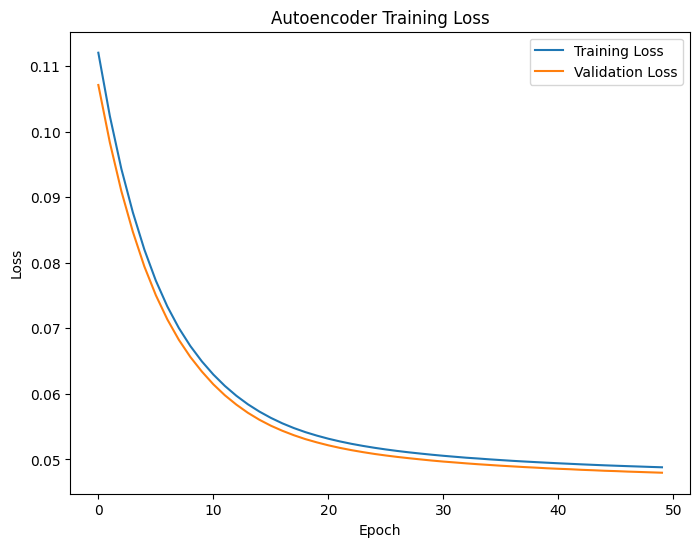

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


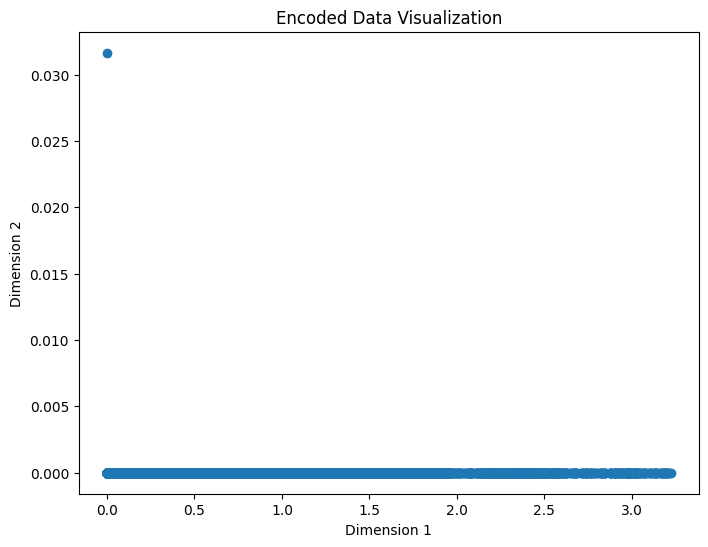

In [84]:
# prompt: buatkan saya basic auto encoder dengan epoch 50 dan tampilkan visualisasinya

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Assuming 'dataolahencoding' is your DataFrame from the previous code
# Replace 'your_file_path' with the actual path to your Excel file
# dataolahencoding = pd.read_excel('your_file_path')


# Select numerical features (replace with your actual numerical columns)
numerical_cols = ['diagnosa_encod', 'institusi_encod', 'area_encod', 'biaya_berobat_encod', 'range_biaya_berobat_numeric']
data_for_autoencoder = dataolahencoding[numerical_cols].fillna(0)  # Handle potential NaN values


# Scale data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_for_autoencoder)


# Split data into training and testing sets
x_train, x_test = train_test_split(scaled_data, test_size=0.2, random_state=42)


# Define the autoencoder model
input_dim = x_train.shape[1]
encoding_dim = 2  # Reduced dimension

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')


# Train the autoencoder
history = autoencoder.fit(x_train, x_train, epochs=50, batch_size=32, shuffle=True, validation_data=(x_test, x_test))


# Plot the training loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Get the encoded representations (latent space)
encoder_model = Model(inputs=input_layer, outputs=encoder)
encoded_data = encoder_model.predict(scaled_data)

# Visualize the encoded data
plt.figure(figsize=(8, 6))
plt.scatter(encoded_data[:, 0], encoded_data[:, 1])
plt.title('Encoded Data Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [85]:
# prompt: buatkan saya basic auto encoder dengan epoch 100 dan tampilkan visualisasinya

# Define the autoencoder model
input_dim = x_train.shape[1]
encoding_dim = 2  # Reduced dimension

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')


# Train the autoencoder
history = autoencoder.fit(x_train, x_train, epochs=100, batch_size=32, shuffle=True, validation_data=(x_test, x_test))


# Plot the training loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Get the encoded representations (latent space)
encoder_model = Model(inputs=input_layer, outputs=encoder)
encoded_data = encoder_model.predict(scaled_data)

# Visualize the encoded data
plt.figure(figsize=(8, 6))
plt.scatter(encoded_data[:, 0], encoded_data[:, 1])
plt.title('Encoded Data Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1337 - val_loss: 0.1155
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1121 - val_loss: 0.1024
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1001 - val_loss: 0.0956
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0944 - val_loss: 0.0912
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0896 - val_loss: 0.0879
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0869 - val_loss: 0.0852
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0844 - val_loss: 0.0829
Epoch 8/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0821 - val_loss: 0.0808
Epoch 9/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0803 - val_loss: 0.0786
Epoch 10/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0780 - val_loss: 0.0726
Epoch 11/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0705 - val_loss: 0.0667
Epoch 12/100
125/125 ━━━━━━━━━━━━━━━━━━━━

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Epoch 1/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1140 - val_loss: 0.1065
Epoch 2/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1036 - val_loss: 0.0984
Epoch 3/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0961 - val_loss: 0.0906
Epoch 4/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0891 - val_loss: 0.0832
Epoch 5/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0819 - val_loss: 0.0768
Epoch 6/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0749 - val_loss: 0.0721
Epoch 7/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0715 - val_loss: 0.0688
Epoch 8/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0674 - val_loss: 0.0664
Epoch 9/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0657 - val_loss: 0.0647
Epoch 10/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0638 - val_loss: 0.0634
Epoch 11/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0627 - val_loss: 0.0623
Epoch 12/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


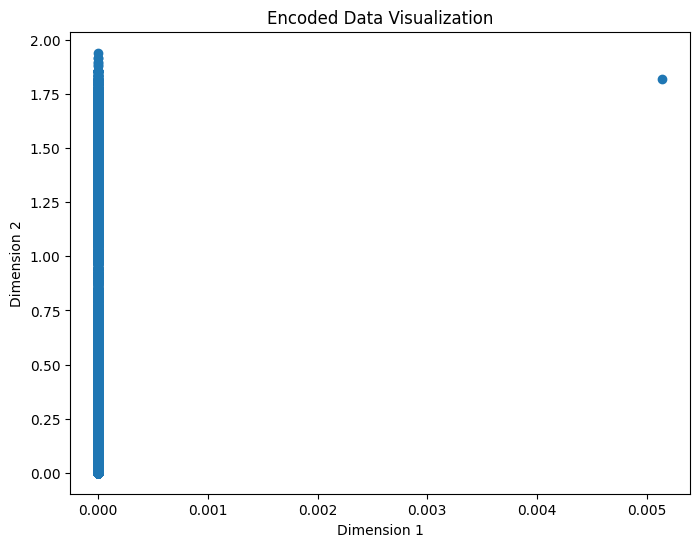

In [87]:
# prompt: buatkan saya basic auto encoder dengan epochnya dikecilkan jadi 25 dan tampilkan visualisasinya

# Define the autoencoder model
input_dim = x_train.shape[1]
encoding_dim = 2  # Reduced dimension

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder with reduced epochs
history = autoencoder.fit(x_train, x_train, epochs=25, batch_size=32, shuffle=True, validation_data=(x_test, x_test))

# Plot the training loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Get the encoded representations (latent space)
encoder_model = Model(inputs=input_layer, outputs=encoder)
encoded_data = encoder_model.predict(scaled_data)

# Visualize the encoded data
plt.figure(figsize=(8, 6))
plt.scatter(encoded_data[:, 0], encoded_data[:, 1])
plt.title('Encoded Data Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


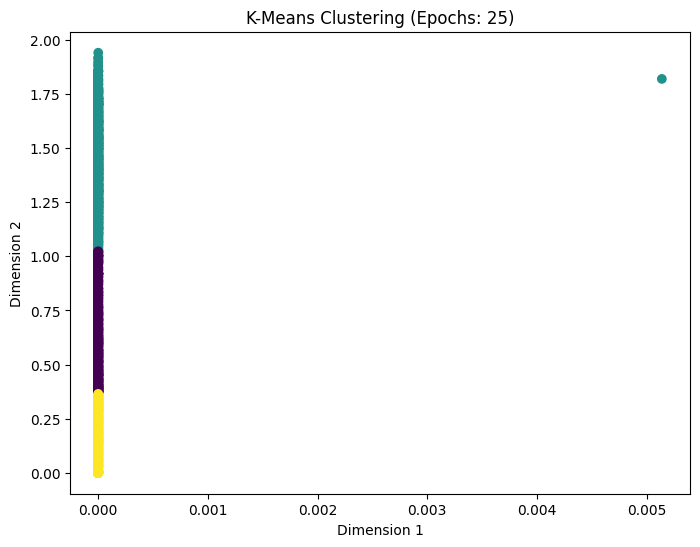

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


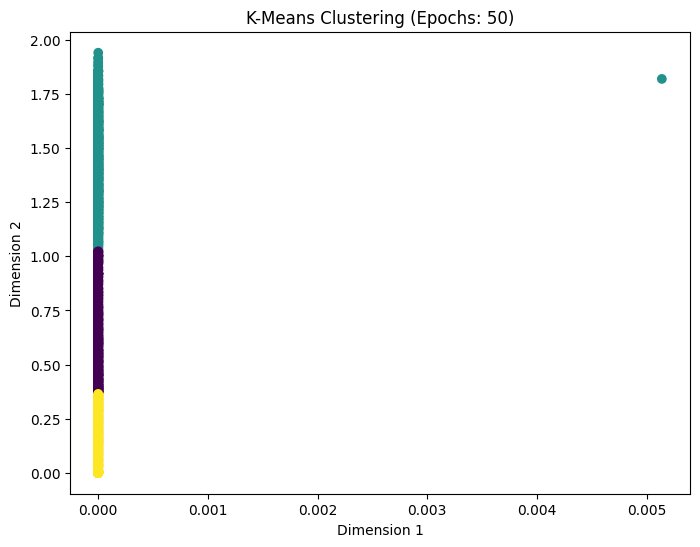

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [88]:
# prompt: sekarang tolong buatkan saya K-means cluster berdasarkan basic auto encoder dengan epoch 25,50,dan 100 dan timpilkan visualisasinya

# Perform K-means clustering on the encoded data for different epochs (25, 50, 100)

for epochs in [25, 50, 100]:
    # ... (Your existing autoencoder code for each epoch) ...

    # After training the autoencoder with the specified epoch

    # Get the encoded representations
    encoder_model = Model(inputs=input_layer, outputs=encoder)
    encoded_data = encoder_model.predict(scaled_data)

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=3, random_state=42)  # You can change the number of clusters
    kmeans.fit(encoded_data)
    labels = kmeans.labels_

    # Visualize the clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(encoded_data[:, 0], encoded_data[:, 1], c=labels, cmap='viridis')
    plt.title(f'K-Means Clustering (Epochs: {epochs})')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.show()